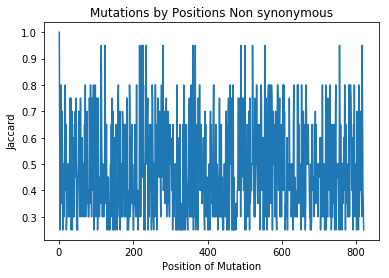

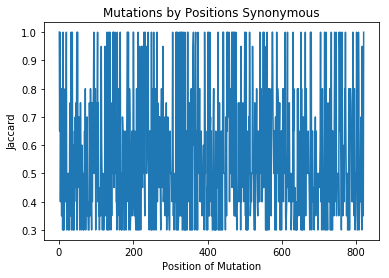

In [4]:
### This code block induces a mutation at systematic positions on the original sequence. The reason why there are so 
### many 1.0 Jaccard values is probably because when I induce a mutation of "V" the original sequence probably had 
### that too. 
import sourmash_lib
Ori="MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNHLVAVIEKTISGQDALPNISDAERIFAELLTGLAAAQPGFPLAQLKTFVDQEFAQIKHVLHGISLLGQCPDSINAALICRGEKVSIAIVAGVLEARGHNVTVIDPVEKLLAVGHYLESTVDIAESTRRIAASRIPADHVVLVAGFTAGNEKGELVVLGRNGSDYSAAVLAACLRADCCEIWTDVDGVYTCDPRQVPDARLLKSVSYQEAVELSYFGAKVLHPRTITPIAQFQIPCLIKNTGNPQAPGTLIGASRDEDELPVKGISNLNNVAVFSVSGPGVKGVVGVAARVFAAVSRARISVVLITQSSSEYSISFCVPQSDCVRAERAVQEEFYLELKEGLLEPLAVTERLAIISVVGDGVRTLRGISAKFFAALARANINIVAIAQGSSERSISVVVNNDDATTGVRVTHQVLFNTDQVIEVFVIGVGGVGGALLEQLKRQQSWLKNKHIDLRVCGVANSKALLTNVHGLNLENWQEELAQAKEPFNLGRLIRLVKEYHLLNPVIVDCTSSQAVADQYADFLREGFHVVTPNKKANTSSVDYYHLLRHAAEKSRRKFLYDTNVGAGLPVIENLQNLLNAGDELVKFSGILSGSLSYIFGKLDEGVSFSEATTLAREVGYTEPDPRDDLSGVDVARKLLILARETGRELELADIEIEPVLPAEFNAEGDVAAFVANLSQLDDLFAARVAKARDEGKVLRYVGNIDEDGVCRVKIAEVDGNDPLFKVKNGENALAFYSHYYQPLPLVLRGYGAGNDVTAAGVFADLLRTLSWKLGV"
Results_non=open("Results_Jaccard_one_nonsynonmymous.txt","w")
Results_syn=open("Results_Jaccard_one_synonmymous.txt","w")
#example="MRVLKFGGTSVANA"
for i in range(0,len(Ori)):
    Mut=Ori
    Mut2=Ori
    Muts2=Mut2.replace(Mut2[i],'V')
    if Ori[i]=="V":
        Muts=Mut.replace(Mut[i],'A')
    else:
        Muts=Mut.replace(Mut[i],'V')
    #print (Muts)
    E1 = sourmash_lib.MinHash(n=20, ksize=21, is_protein=True)
    E1.add_protein(Ori)
    E2 = sourmash_lib.MinHash(n=20, ksize=21, is_protein=True)
    E2.add_protein(Muts)
    E22 = sourmash_lib.MinHash(n=20, ksize=21, is_protein=True)
    E22.add_protein(Muts2)
    Jaccard1=round(E1.jaccard(E2), 2)
    Jaccard2=round(E1.jaccard(E22),2)
    Results_non.write(str(Jaccard1)+"\n")
    Results_syn.write(str(Jaccard2)+"\n")
Results_non.close()
Results_syn.close()
with open("Results_Jaccard_one_nonsynonmymous.txt") as f:
    contents = f.readlines()
    #print (content)
    contents = [x.strip() for x in contents]
    contents= [float(x) for x in contents]
    position_mutations=[]
    for i in range(1,len(Ori)+1):
        #print (i)
        position_mutations.append(i)
with open("Results_Jaccard_one_synonmymous.txt") as f:
    contents1 = f.readlines()
    #print (content)
    contents1 = [x.strip() for x in contents1]
    contents1= [float(x) for x in contents1]
    position_mutations1=[]
    for i in range(1,len(Ori)+1):
        #print (i)
        position_mutations1.append(i)        
import matplotlib.pyplot as plt
plt.plot(position_mutations,contents)
plt.ylabel('Jaccard')
plt.xlabel('Position of Mutation')
plt.title("Mutations by Positions Non synonymous")
plt.show()
plt.plot(position_mutations1,contents1)
plt.ylabel('Jaccard')
plt.xlabel('Position of Mutation')
plt.title("Mutations by Positions Synonymous")
plt.show()

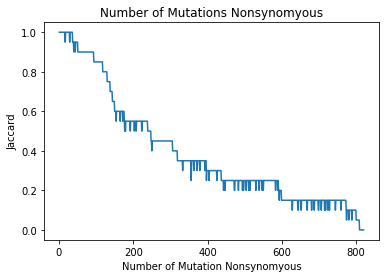

In [9]:
### The following code block can induce a mutation systematically and save that mutation. Ori: MTD Mut:VTD then Mut:VVD
import sourmash_lib
Ori="MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNHLVAVIEKTISGQDALPNISDAERIFAELLTGLAAAQPGFPLAQLKTFVDQEFAQIKHVLHGISLLGQCPDSINAALICRGEKVSIAIVAGVLEARGHNVTVIDPVEKLLAVGHYLESTVDIAESTRRIAASRIPADHVVLVAGFTAGNEKGELVVLGRNGSDYSAAVLAACLRADCCEIWTDVDGVYTCDPRQVPDARLLKSVSYQEAVELSYFGAKVLHPRTITPIAQFQIPCLIKNTGNPQAPGTLIGASRDEDELPVKGISNLNNVAVFSVSGPGVKGVVGVAARVFAAVSRARISVVLITQSSSEYSISFCVPQSDCVRAERAVQEEFYLELKEGLLEPLAVTERLAIISVVGDGVRTLRGISAKFFAALARANINIVAIAQGSSERSISVVVNNDDATTGVRVTHQVLFNTDQVIEVFVIGVGGVGGALLEQLKRQQSWLKNKHIDLRVCGVANSKALLTNVHGLNLENWQEELAQAKEPFNLGRLIRLVKEYHLLNPVIVDCTSSQAVADQYADFLREGFHVVTPNKKANTSSVDYYHLLRHAAEKSRRKFLYDTNVGAGLPVIENLQNLLNAGDELVKFSGILSGSLSYIFGKLDEGVSFSEATTLAREVGYTEPDPRDDLSGVDVARKLLILARETGRELELADIEIEPVLPAEFNAEGDVAAFVANLSQLDDLFAARVAKARDEGKVLRYVGNIDEDGVCRVKIAEVDGNDPLFKVKNGENALAFYSHYYQPLPLVLRGYGAGNDVTAAGVFADLLRTLSWKLGV"
Results=open("Results_Jaccard_all_nonsynomyous.txt","w")
#print (Ori)
for i in range(0,len(Ori)):
    if i==0:
        sequence='V'+Ori[1:]
    else:
        if Ori[i]=='V':
            beginning=sequence[0:i]
            first=beginning+'A'
            sequence=first+Ori[i+1:]
        else:
            beginning=sequence[0:i]
            #print (beginning)
            first=beginning+'V'
            sequence=first+Ori[i+1:]
    #print (sequence)
    E1 = sourmash_lib.MinHash(n=20, ksize=21, is_protein=True)
    E1.add_protein(Ori)
    #print (Ori)
    E2 = sourmash_lib.MinHash(n=20, ksize=21, is_protein=True)
    E2.add_protein(sequence)
    #print (Muts)
    Jaccard=E1.jaccard(E2)
    #print (Jaccard)
    Results.write(str(Jaccard)+"\n")
Results.close()
### The following code saves the jaccard distances stores it in a list. 
with open("Results_Jaccard_all_nonsynomyous.txt") as f:
    content = f.readlines()
    #print (content)
    content = [x.strip() for x in content]
    content= [float(x) for x in content]
    num_mutations=[]
    for i in range(1,len(Ori)+1):
        #print (i)
        num_mutations.append(i)
    #print (num_mutations)
#print (len(content))
#print (len(num_mutations))
### The following plots the jaccard distance to the number of mutations. 
import matplotlib.pyplot as plt
plt.plot(num_mutations,content)
plt.ylabel('Jaccard')
plt.xlabel('Number of Mutation Nonsynomyous')
plt.title("Number of Mutations Nonsynomyous")
plt.show()

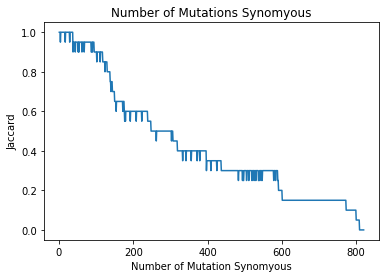

In [14]:
### The following code block can induce a mutation systematically and save that mutation. Ori: MTD Mut:VTD then Mut:VVD
#import sourmash_lib
Ori="MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNHLVAVIEKTISGQDALPNISDAERIFAELLTGLAAAQPGFPLAQLKTFVDQEFAQIKHVLHGISLLGQCPDSINAALICRGEKVSIAIVAGVLEARGHNVTVIDPVEKLLAVGHYLESTVDIAESTRRIAASRIPADHVVLVAGFTAGNEKGELVVLGRNGSDYSAAVLAACLRADCCEIWTDVDGVYTCDPRQVPDARLLKSVSYQEAVELSYFGAKVLHPRTITPIAQFQIPCLIKNTGNPQAPGTLIGASRDEDELPVKGISNLNNVAVFSVSGPGVKGVVGVAARVFAAVSRARISVVLITQSSSEYSISFCVPQSDCVRAERAVQEEFYLELKEGLLEPLAVTERLAIISVVGDGVRTLRGISAKFFAALARANINIVAIAQGSSERSISVVVNNDDATTGVRVTHQVLFNTDQVIEVFVIGVGGVGGALLEQLKRQQSWLKNKHIDLRVCGVANSKALLTNVHGLNLENWQEELAQAKEPFNLGRLIRLVKEYHLLNPVIVDCTSSQAVADQYADFLREGFHVVTPNKKANTSSVDYYHLLRHAAEKSRRKFLYDTNVGAGLPVIENLQNLLNAGDELVKFSGILSGSLSYIFGKLDEGVSFSEATTLAREVGYTEPDPRDDLSGVDVARKLLILARETGRELELADIEIEPVLPAEFNAEGDVAAFVANLSQLDDLFAARVAKARDEGKVLRYVGNIDEDGVCRVKIAEVDGNDPLFKVKNGENALAFYSHYYQPLPLVLRGYGAGNDVTAAGVFADLLRTLSWKLGV"
Results=open("Results_Jaccard_all_synomyous.txt","w")
#print (Ori)
Mut=Ori
for i in range(0,len(Ori),1):
    Muts=Mut.replace(Mut[i],'V',1)
    Mut=Muts
    #print (Muts)
    E1 = sourmash_lib.MinHash(n=20, ksize=21, is_protein=True)
    E1.add_protein(Ori)
    #print (Ori)
    E2 = sourmash_lib.MinHash(n=20, ksize=21, is_protein=True)
    E2.add_protein(Muts)
    #print (Muts)
    Jaccard=E1.jaccard(E2)
    #print (Jaccard)
    Results.write(str(Jaccard)+"\n")
Results.close()
### The following code saves the jaccard distances stores it in a list. 
with open("Results_Jaccard_all_synomyous.txt") as f:
    content11 = f.readlines()
    #print (content)
    content11 = [x.strip() for x in content11]
    content11= [float(x) for x in content11]
    num_mutations11=[]
    for i in range(1,len(Ori)+1):
        #print (i)
        num_mutations11.append(i)
    #print (num_mutations)
#print (len(content))
#print (len(num_mutations))
### The following plots the jaccard distance to the number of mutations. 
import matplotlib.pyplot as plt
plt.plot(num_mutations11,content11)
plt.ylabel('Jaccard')
plt.xlabel('Number of Mutation Synomyous')
plt.title("Number of Mutations Synomyous")
plt.show()
    

In [2]:
Ori="MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNHLVAVIEKTISGQDALPNISDAERIFAELLTGLAAAQPGFPLAQLKTFVDQEFAQIKHVLHGISLLGQCPDSINAALICRGEKVSIAIVAGVLEARGHNVTVIDPVEKLLAVGHYLESTVDIAESTRRIAASRIPADHVVLVAGFTAGNEKGELVVLGRNGSDYSAAVLAACLRADCCEIWTDVDGVYTCDPRQVPDARLLKSVSYQEAVELSYFGAKVLHPRTITPIAQFQIPCLIKNTGNPQAPGTLIGASRDEDELPVKGISNLNNVAVFSVSGPGVKGVVGVAARVFAAVSRARISVVLITQSSSEYSISFCVPQSDCVRAERAVQEEFYLELKEGLLEPLAVTERLAIISVVGDGVRTLRGISAKFFAALARANINIVAIAQGSSERSISVVVNNDDATTGVRVTHQVLFNTDQVIEVFVIGVGGVGGALLEQLKRQQSWLKNKHIDLRVCGVANSKALLTNVHGLNLENWQEELAQAKEPFNLGRLIRLVKEYHLLNPVIVDCTSSQAVADQYADFLREGFHVVTPNKKANTSSVDYYHLLRHAAEKSRRKFLYDTNVGAGLPVIENLQNLLNAGDELVKFSGILSGSLSYIFGKLDEGVSFSEATTLAREVGYTEPDPRDDLSGVDVARKLLILARETGRELELADIEIEPVLPAEFNAEGDVAAFVANLSQLDDLFAARVAKARDEGKVLRYVGNIDEDGVCRVKIAEVDGNDPLFKVKNGENALAFYSHYYQPLPLVLRGYGAGNDVTAAGVFADLLRTLSWKLGV"
len(Ori)

820